<a href="https://colab.research.google.com/github/saeedrafsharx/R_Beheshti_Exercises/blob/main/Unit_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##کتابخونه های لازم رو صدا میکنیم بیان و پکیج هاشون رو هم نصب میکنیم

In [ ]:
install.packages("rstatix", repos = "https://cloud.r-project.org")

In [ ]:
install.packages("ggpubr")

In [ ]:
library(readxl)

In [ ]:
library(ggpubr)

In [ ]:
library(rstatix)

## داده هامون رو میریزیم داخل Data_normal

In [ ]:
Data_normal = read_excel("GoNoGo_bias_OneGroup.xlsx")

In [ ]:
Data_normal

## یه خلاصه از آماره ی نمونه میگیریم ببینیم چه خبره، چخبرتونه

In [ ]:
Data_normal %>% get_summary_stats(bias)

variable,n,min,max,median,q1,q3,iqr,mad,mean,sd,se,ci
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bias,12,0.52,0.78,0.725,0.62,0.77,0.15,0.074,0.694,0.092,0.026,0.058


## یه نمودار جعبه ای کشیدیم، نمی‌دونم چرا؟!

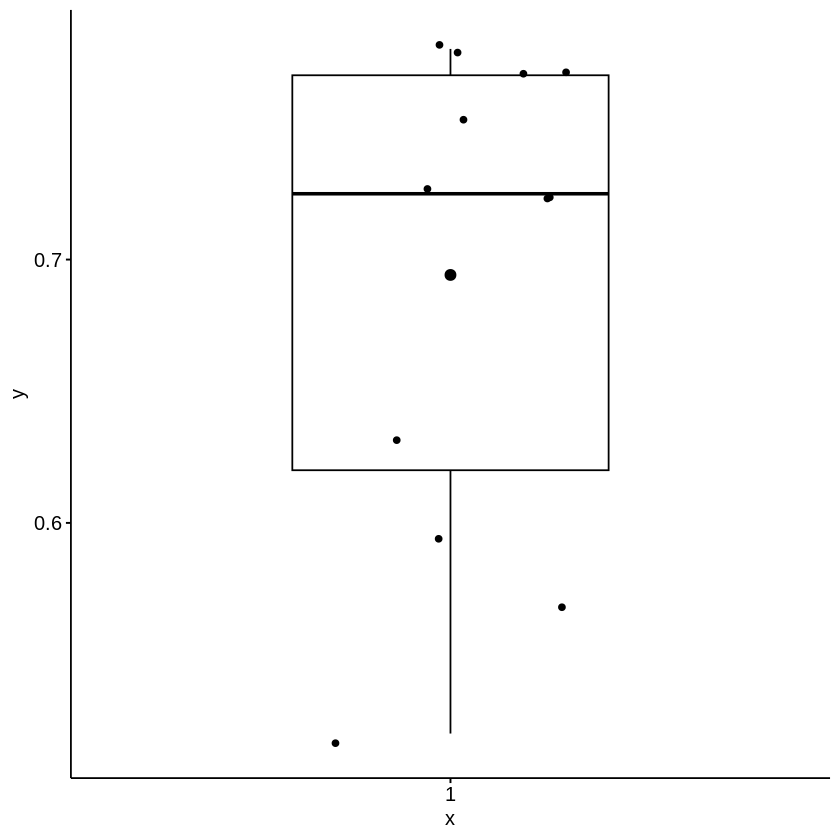

In [ ]:
ggboxplot(Data_normal$bias, width = 0.5, add = c("mean","jitter"), fun.ylab="bias")

## نمودار کیو کیو پلات کشیدیم ببینیم آیا پیش شرط نرمال بودن توزیع رو داریم یا نه
## چون واسه تست های پارامتریک باید توزیع جامعه نرمال باشه

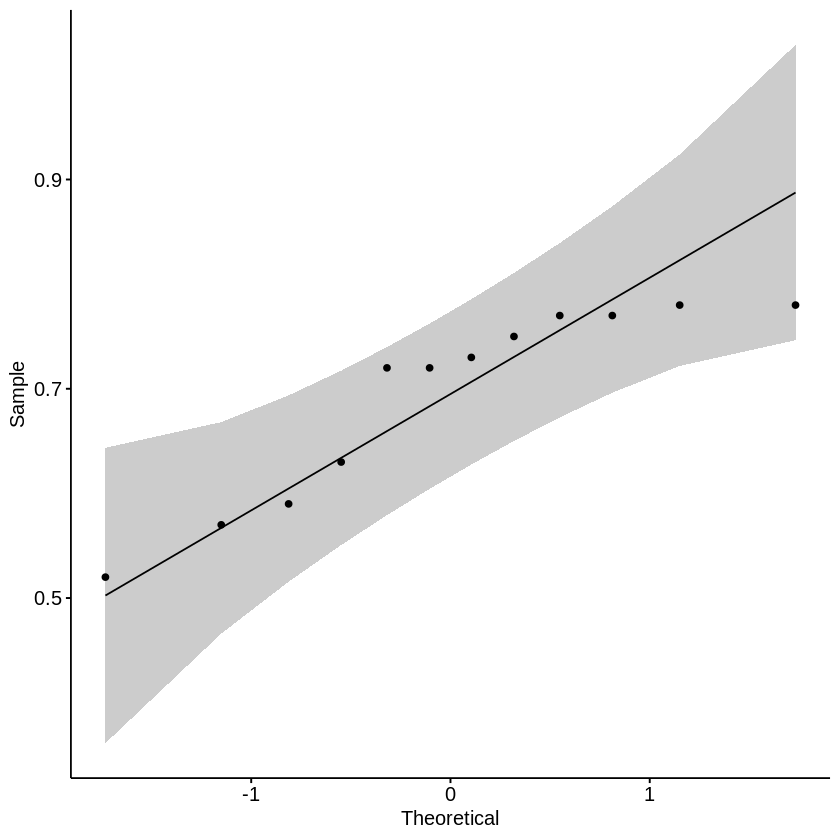

In [ ]:
ggqqplot(Data_normal,"bias")

## یه راه دیگه واسه بررسی نرمال بودن توزیع جامعه شاپیرو هست
### اگر مقدار پی بیشتر از ۰.۵ باشه توزیع نرماله

In [ ]:
Data_normal %>% shapiro_test(bias)

variable,statistic,p
<chr>,<dbl>,<dbl>
bias,0.844051,0.03102369


## پیش شرط دیگه ی آزمون های پارامتریک مثل تی، اینه که داده پرت نداشته باشیم
## پس از دستور زیر استفاده میکنیم بهمون بگه داریم با نه
### اگر بود باید کاریش کرد که استاد گفت سر کلاس میگم

In [ ]:
Data_normal %>% identify_outliers(bias)

subj,bias,is.outlier,is.extreme
<dbl>,<dbl>,<lgl>,<lgl>


## پیش شرط هارو داشتیم، تست تی میگیریم،
### مقدار پی خییییییلی کمه پس فرض صفرمون رد میشه

In [ ]:
Data_normal %>% t_test(bias ~ 1, mu= 0.5)

,.y.,group1,group2,n,statistic,df,p
,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,bias,1,null model,12,7.327255,11,1.49e-05


## یه آزمون کوهن دی هم میگیریم تا اندازه اثر بدست بیاریم
### اندازه رو زده لارج پس اندازه اثر خوبی داریم و جوابه

In [ ]:
Data_normal %>% cohens_d(bias ~ 1, mu=0.5)

,.y.,group1,group2,effsize,n,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<ord>
1,bias,1,null model,2.115196,12,large
